<h1> 0) Import libraries

In [2]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats
import requests
import sklearn
import scipy
import csv

<h1> PART1

<h2> 1) Loading dataset

In [3]:
# loading dataset from csv file using pandas
### START CODE HERE ### 
dataset =  pd.read_csv("frcities.csv")
### END OF SOLUTION ### 
dataset.head()

,city,lat,lng,iso2,density,population,ranking
0,Saint-Oblas,45.5674,5.0447,FR,129.2,NaN,4
1,Louresse,47.2394,-0.3136,FR,NaN,872.0,3
2,Olmet,45.7100,3.6614,FR,10.4,161.0,3
3,Olmet,44.9542,2.6108,FR,71.0,NaN,4
4,Gottenhouse,48.7208,7.3611,FR,305.6,382.0,3


In [4]:
dataset.shape

(59064, 7)

<h2> 2) Dleting null values.</h2>
<h5>for further calculation we need to delete rows with null values!

In [6]:
### START CODE HERE ### 
dataset = dataset.dropna(subset=['population'])
### END OF SOLUTION ###
#If there is a null value in dataset ,
#the number of rows must have decreased after removing them.
display(dataset)

,city,lat,lng,iso2,density,population,ranking
1,Louresse,47.2394,-0.3136,FR,NaN,872.0,3
2,Olmet,45.7100,3.6614,FR,10.4,161.0,3
4,Gottenhouse,48.7208,7.3611,FR,305.6,382.0,3
5,Bergues,50.9686,2.4342,FR,2755.3,3637.0,2
7,Saint-Martin-d’Arrossa,43.2381,-1.3133,FR,29.2,538.0,3
...,...,...,...,...,...,...,...
59056,Cognocoli-Monticchi,41.8283,8.9058,FR,4.8,171.0,3
59057,La Rochette,45.4586,6.1203,FR,804.1,3747.0,3
59058,La Rochette,44.9161,4.2408,FR,4.3,60.0,3
59061,Saint-Eutrope,45.4181,0.1114,FR,62.9,168.0,3


In [7]:
dataset = dataset.drop_duplicates(subset=['city'],keep='last')
dataset.shape

(33481, 7)

<h1> PART2

<h2> 3) Visualizing data

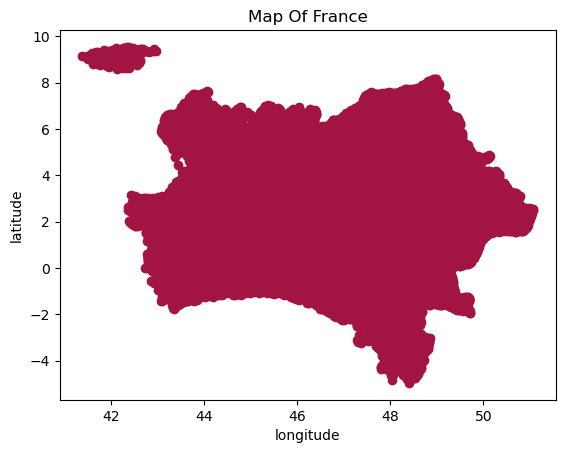

In [8]:
### START CODE HERE ### 
plt.scatter(dataset['lat'], dataset['lng'], color = "#a21441")
plt.title('Map Of France')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()
### END OF SOLUTION ###

<h2> 4) converting lat and long to KM

,city,lat,lng,iso2,density,population,ranking,latitude_km,longitude_km
1,Louresse,47.2394,-0.3136,FR,NaN,872.0,3,4109.8278,-34.496
4,Gottenhouse,48.7208,7.3611,FR,305.6,382.0,3,4238.7096,809.721
5,Bergues,50.9686,2.4342,FR,2755.3,3637.0,2,4434.2682,267.762
7,Saint-Martin-d’Arrossa,43.2381,-1.3133,FR,29.2,538.0,3,3761.7147,-144.463
8,Marre,49.2111,5.3019,FR,16.0,163.0,3,4281.3657,583.209
...,...,...,...,...,...,...,...,...,...
59055,Neuvecelle,46.3950,6.6125,FR,769.0,3076.0,3,4036.3650,727.375
59056,Cognocoli-Monticchi,41.8283,8.9058,FR,4.8,171.0,3,3639.0621,979.638
59058,La Rochette,44.9161,4.2408,FR,4.3,60.0,3,3907.7007,466.488
59061,Saint-Eutrope,45.4181,0.1114,FR,62.9,168.0,3,3951.3747,12.254


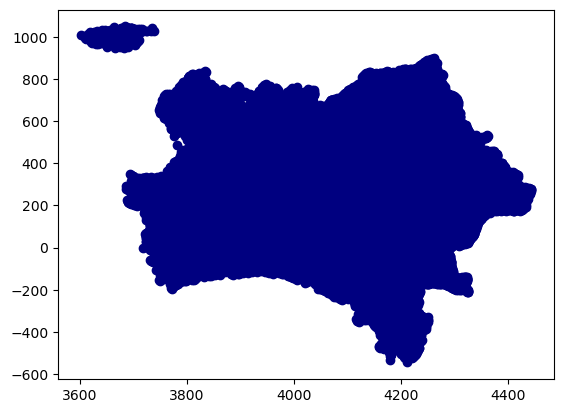

In [9]:
### START CODE HERE ### 
def convert(longitude,latitude):
    return longitude*latitude
dataset ['latitude_km'] = dataset['lat'].apply(convert, args=[87])
dataset ['longitude_km'] = dataset['lng'].apply(convert, args=[110])
display(dataset)
### END OF SOLUTION ###
#visualizing dataset after converting 
### START CODE HERE ### 
Variable = dataset.latitude_km.values.tolist()
Variablee = dataset.longitude_km.values.tolist()
plt.scatter(Variable,Variablee , color = "#000080")
plt.show()
### END OF SOLUTION ###

<h1> PART3

<h2> 5) converting dataset to numpy array and given point to km

In [10]:
### START CODE HERE ### 
#Lat_point = ... * 87
#Lng_point = ... * 110
#dataset_arr = ...
Lat_point = 44 * 87
Lng_point = -1.2 * 110
dataset_arr = np.array(dataset)
display(dataset_arr)
### END OF SOLUTION ###

array([['Louresse', 47.2394, -0.3136, ..., 3, 4109.8278, -34.496],
       ['Gottenhouse', 48.7208, 7.3611, ..., 3, 4238.7096, 809.721],
       ['Bergues', 50.9686, 2.4342, ..., 2, 4434.2682, 267.762],
       ...,
       ['La Rochette', 44.9161, 4.2408, ..., 3, 3907.7007, 466.488],
       ['Saint-Eutrope', 45.4181, 0.1114, ..., 3, 3951.3747000000003,
        12.254],
       ['Taillis', 48.1889, -1.2389, ..., 3, 4192.4343, -136.279]],
      dtype=object)

<h2> 6) Finding cities within a radius of 150 km

In [11]:
### START CODE HERE ### 
city_fr = []
for row in dataset_arr:
    if (row[-2] - Lat_point)**2 + (row[-1] - Lng_point)**2 <= 150**2:
        city_fr.append(row)
### END OF SOLUTION ###

<h2> 7) convert the result to dataframe

In [18]:
### START CODE HERE ### 
column_headers = list(dataset.columns.values)
my_dataset= pd.DataFrame(city_fr, columns=column_headers)
display(my_dataset)
### END OF SOLUTION ###

,city,lat,lng,iso2,density,population,ranking,latitude_km,longitude_km
0,Saint-Martin-d’Arrossa,43.2381,-1.3133,FR,29.2,538.0,3,3761.7147,-144.463
1,Coutras,45.0408,-0.1289,FR,254.7,8582.0,3,3918.5496,-14.179
2,Bunus,43.2028,-1.0672,FR,19.5,129.0,3,3758.6436,-117.392
3,Plassac,45.4664,-0.5686,FR,39.5,612.0,3,3955.5768,-62.546
4,Mérignas,44.7844,-0.0878,FR,36.0,344.0,3,3896.2428,-9.658
...,...,...,...,...,...,...,...,...,...
1467,Saint-Antoine-du-Queyret,44.7631,0.0097,FR,8.5,58.0,3,3894.3897,1.067
1468,Béhorléguy,43.1286,-1.1186,FR,3.5,73.0,3,3752.1882,-123.046
1469,Langoiran,44.7075,-0.4011,FR,211.0,2140.0,3,3889.5525,-44.121
1470,Labescau,44.4442,-0.0889,FR,20.5,123.0,3,3866.6454,-9.779


<h2> 8) Calculate the population density and store it in the pop/dens column

In [13]:
### START CODE HERE ### 
# dataset['pop'] = dataset['population']
# dataset['dens'] = dataset ['density']
# display(dataset)

my_dataset['pop/dens'] = my_dataset['population'] / my_dataset['density']
display(my_dataset)

# my_dataset['pop/dens'] = my_dataset.apply(lambda x: x["population"] / x["density"], axis=1)
# print(my_dataset)
### END OF SOLUTION ###

,city,lat,lng,iso2,density,population,ranking,latitude_km,longitude_km,pop/dens
0,Saint-Martin-d’Arrossa,43.2381,-1.3133,FR,29.2,538.0,3,3761.7147,-144.463,18.424658
1,Coutras,45.0408,-0.1289,FR,254.7,8582.0,3,3918.5496,-14.179,33.694543
2,Bunus,43.2028,-1.0672,FR,19.5,129.0,3,3758.6436,-117.392,6.615385
3,Plassac,45.4664,-0.5686,FR,39.5,612.0,3,3955.5768,-62.546,15.493671
4,Mérignas,44.7844,-0.0878,FR,36.0,344.0,3,3896.2428,-9.658,9.555556
...,...,...,...,...,...,...,...,...,...,...
1467,Saint-Antoine-du-Queyret,44.7631,0.0097,FR,8.5,58.0,3,3894.3897,1.067,6.823529
1468,Béhorléguy,43.1286,-1.1186,FR,3.5,73.0,3,3752.1882,-123.046,20.857143
1469,Langoiran,44.7075,-0.4011,FR,211.0,2140.0,3,3889.5525,-44.121,10.142180
1470,Labescau,44.4442,-0.0889,FR,20.5,123.0,3,3866.6454,-9.779,6.000000


In [14]:
my_dataset['population'] = my_dataset['population'].astype('int')
my_dataset['density'] = my_dataset['density'].astype('float')

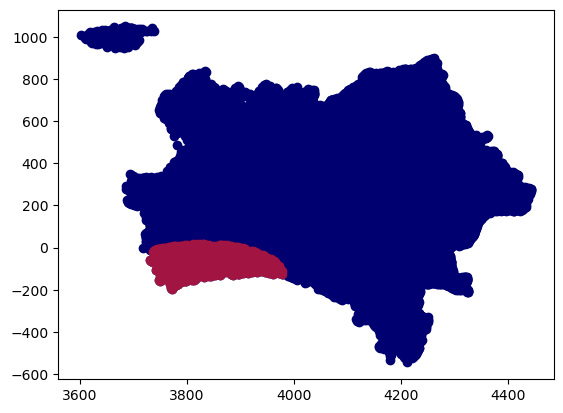

In [16]:
### START CODE HERE ### 
variable = dataset.latitude_km.values.tolist()
variablee = dataset.longitude_km.values.tolist()
plt.scatter(variable,variablee, color = '#000070')
variable = my_dataset.latitude_km.values.tolist()
variablee = my_dataset.longitude_km.values.tolist()
plt.scatter(variable,variablee , color='#a21441')
plt.show()
### END OF SOLUTION ###

<h1> PART4 : Correlations

In [17]:
### START CODE HERE ### 
# 9) pearson
display(
'Pearson:',
scipy.stats.pearsonr(my_dataset['density'], my_dataset['population']),
scipy.stats.pearsonr(my_dataset['lat'], my_dataset['pop/dens']),
)
# 10) spearman
display(
'Spearman:',
scipy.stats.spearmanr(my_dataset['density'], my_dataset['population']),
scipy.stats.spearmanr(my_dataset['lat'], my_dataset['pop/dens']),
)
# 11) kendal tau
display(
'Kendall Tau:',
scipy.stats.kendalltau(my_dataset['density'], my_dataset['population']),
scipy.stats.kendalltau(my_dataset['lat'], my_dataset['pop/dens']),
)
### END OF SOLUTION ###

'Pearson:'

PearsonRResult(statistic=0.6942889470400686, pvalue=3.06080365505944e-212)

PearsonRResult(statistic=0.09632576482843852, pvalue=0.0002146102868738654)

'Spearman:'

SpearmanrResult(correlation=0.6967304182433208, pvalue=2.4236988971316524e-214)

SpearmanrResult(correlation=0.11865490046805215, pvalue=5.0030977311049964e-06)

'Kendall Tau:'

KendalltauResult(correlation=0.514258563310695, pvalue=9.829745683829765e-192)

KendalltauResult(correlation=0.08446064721519414, pvalue=1.2070974078282535e-06)